# Mask R-CNN - Inspect Ballon Trained Model

Code and visualizations to test, debug, and evaluate the Mask R-CNN model.

In [21]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

#from samples.balloon import balloon

import fashion
%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Path to Ballon trained weights
# You can download this file from the Releases page
# https://github.com/matterport/Mask_RCNN/releases
BALLON_WEIGHTS_PATH = "D:/object_detection/Mask_RCNN-master/logs/fashion20181007T0116/mask_rcnn_fashion_0019.h5"  # hardcoded the path...

## Configurations

In [22]:
config = fashion.BalloonConfig()
CUSTOM_DIR = os.path.join('fashion/')

In [23]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    # Give the configuration a recognizable name
    # Give the configuration a recognizable name
    NAME = "fashion"
    BATCH_SIZE = 1
    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 1
    # Number of classes (including background)
    NUM_CLASSES = 1 + 3  # Background + bag +top +boots

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 125

    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9

    IMAGE_MIN_DIM = 512
    IMAGE_MAX_DIM = 1024

    TRAIN_ROIS_PER_IMAGE = 200

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                16
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0, 'mrcnn_class_loss': 1.0, 'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

## Notebook Preferences

In [24]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [25]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Load Model

In [26]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

In [27]:
# Set path to balloon weights file

# Download file from the Releases page and set its path
# https://github.com/matterport/Mask_RCNN/releases
# weights_path = "/path/to/mask_rcnn_balloon.h5"

# Or, load the last model you trained
weights_path = "D:/object_detection/Mask_RCNN-master/logs/fashion20181007T0116/mask_rcnn_fashion_0019.h5" #hard coded... sorry

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  D:/object_detection/Mask_RCNN-master/logs/fashion20181007T0116/mask_rcnn_fashion_0019.h5
Re-starting from epoch 19


## Run Detection

In [ ]:
print(dataset.image_ids)

1
Processing 1 images
image                    shape: (2209, 2209, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -122.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 2209.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
1
Processing 1 images
image                    shape: (275, 183, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
1
Processing 1 images
image                    shape: (1125, 750, 3)        min:    2.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max: 

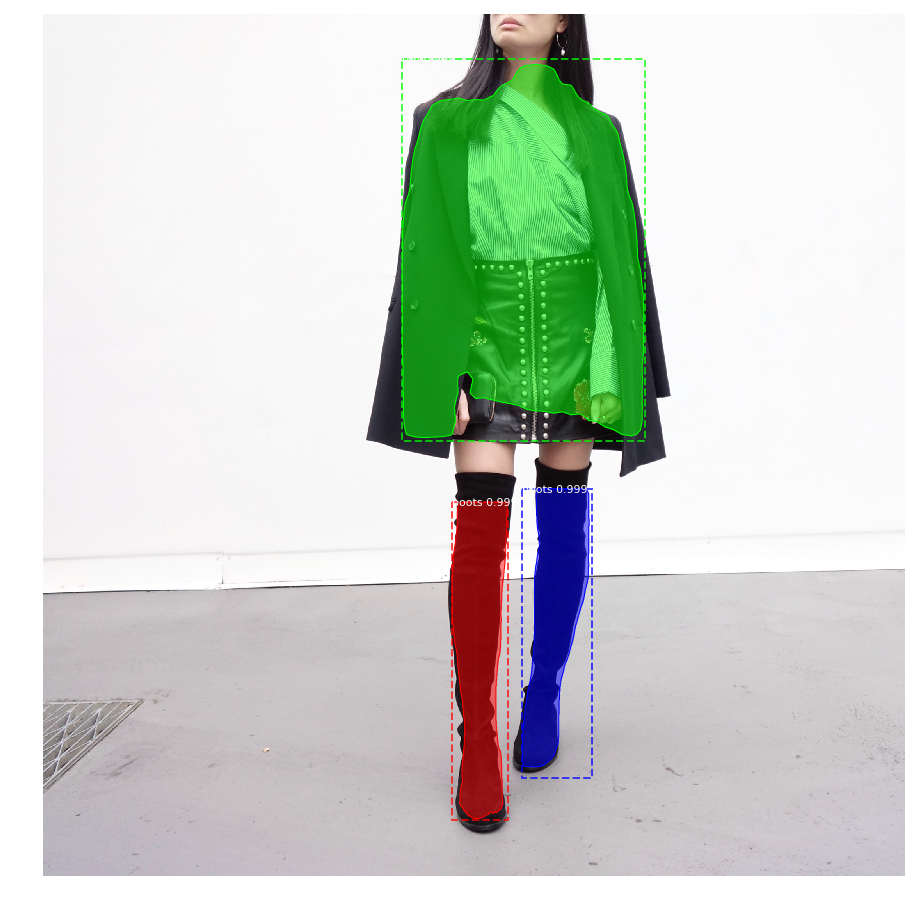

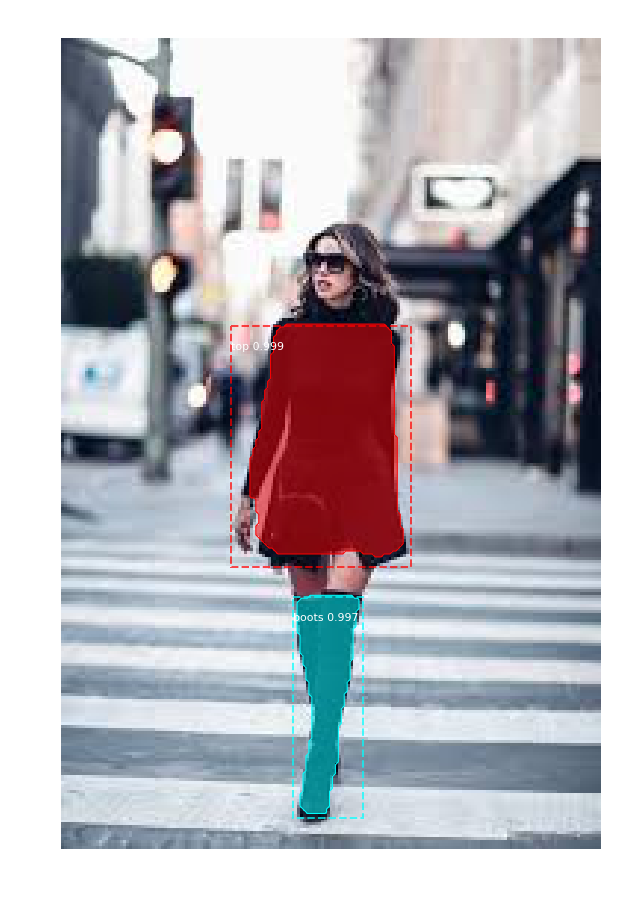

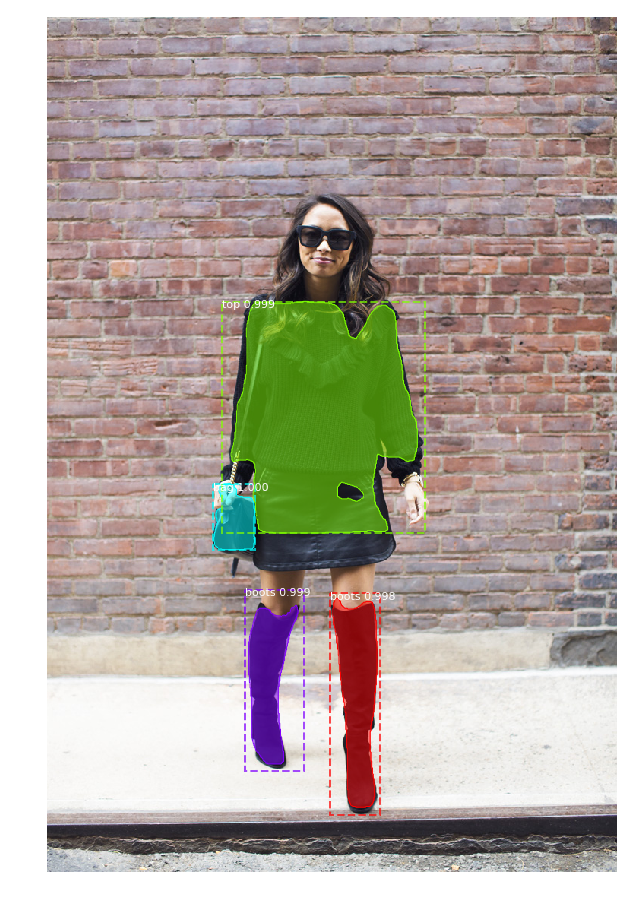

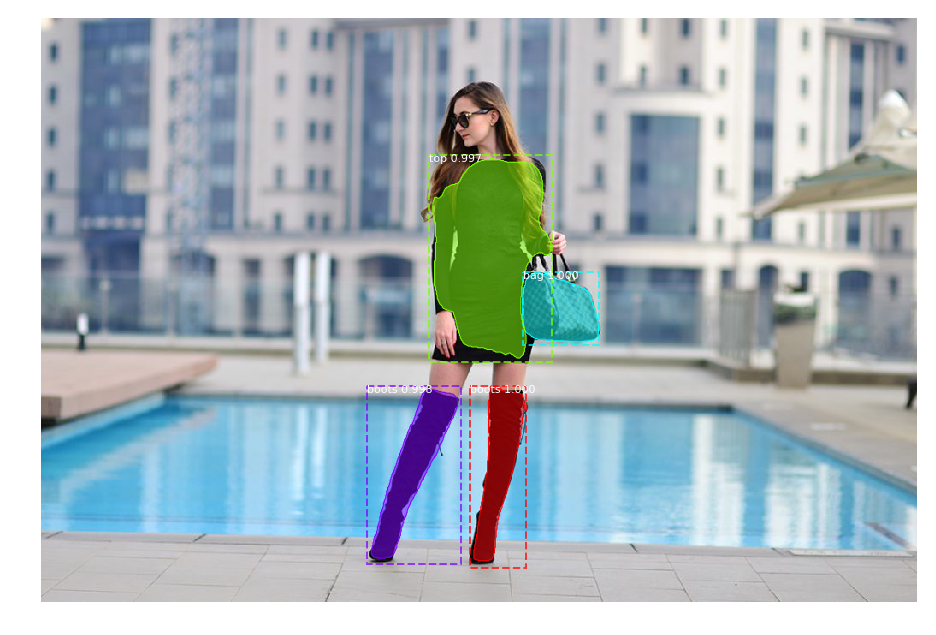

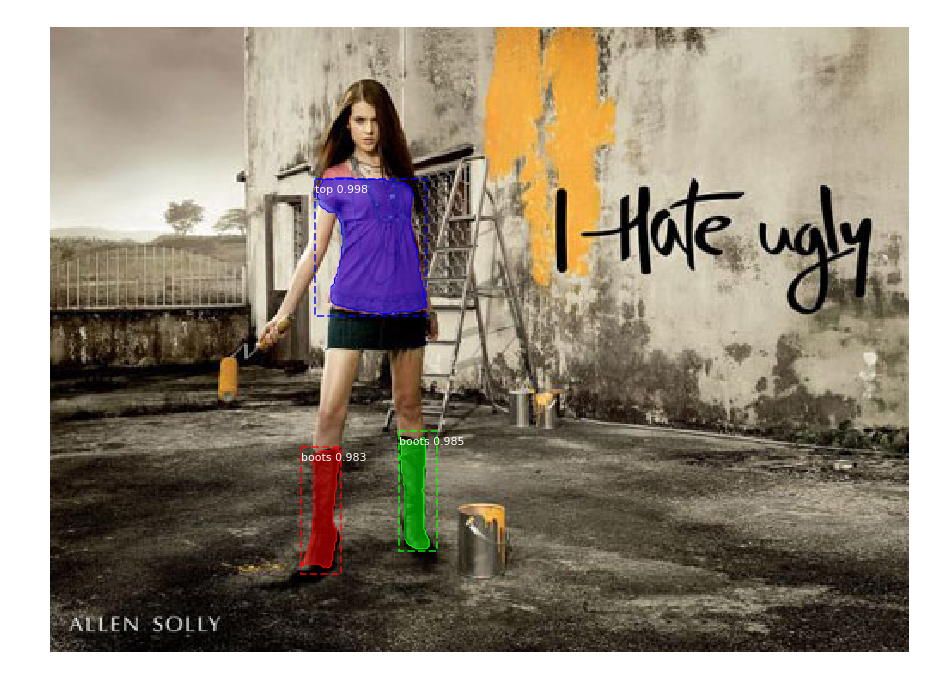

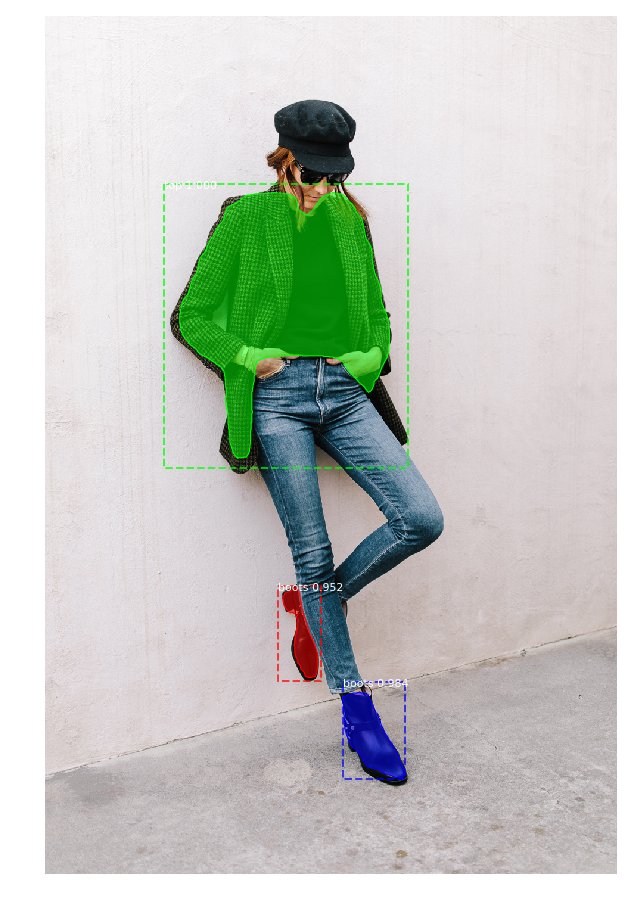

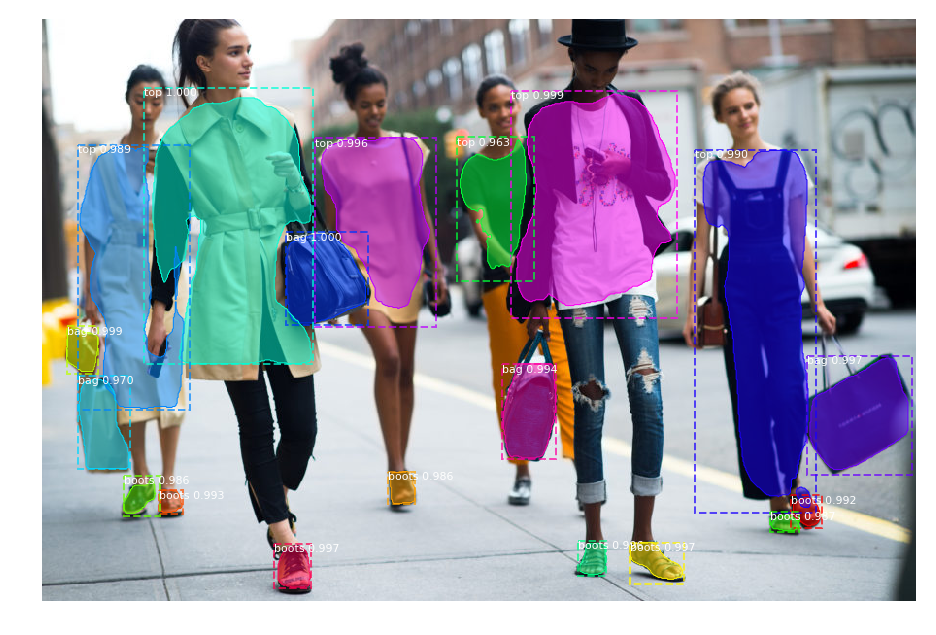

In [115]:
img_list = ['image-20.jpg','images.jpg','stuart_weitzman_otk_boots_alljill_1.jpg',
           'YDE-stuart-weitzman-style-suede-over-the-knee-boots-1024x682.jpg','1-Wall.preview.jpg','Stuart-weitzman-boots-could-i-have-that-4.jpg',
           '7454-Le-21eme-Adam-Katz-Sinding-After-31-Phillip-Lim-Mercedes-Benz-New-York-Fashion-Week-Spring-Summer-2015_AKS6971-900x599.jpg']
import matplotlib.image as mpimg


for img in img_list:

    
    image = mpimg.imread('fashion/val/'+str(img))
    # Run object detection
    print(len([image]))
    results = model.detect([image], verbose=1)

    # Display results
    ax = get_ax(1)
    r = results[0]
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                                ['BG', 'top', 'boots', 'bag'], r['scores'], ax=ax,
                                title="")
    

1
Processing 1 images
image                    shape: (682, 1024, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


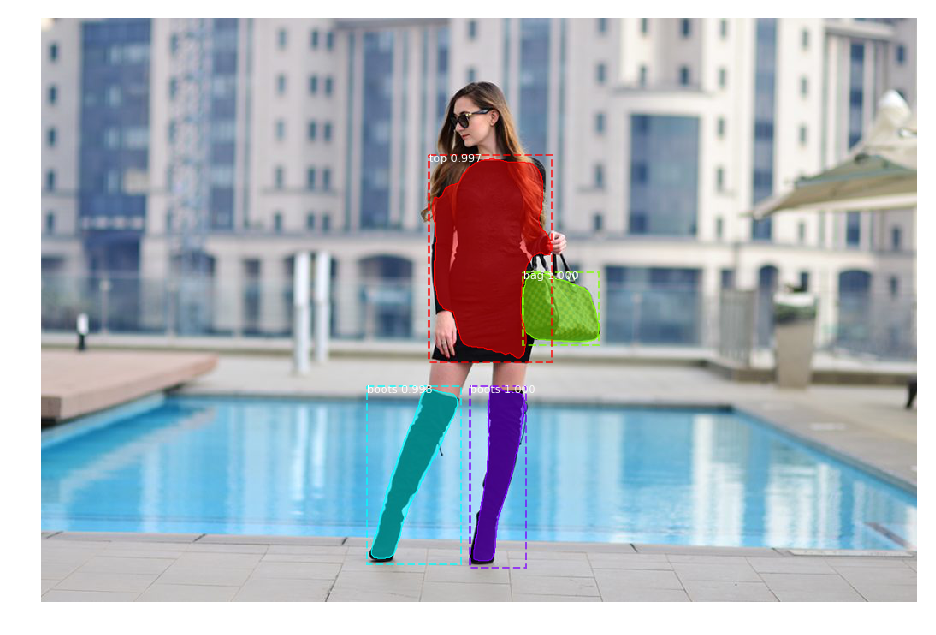

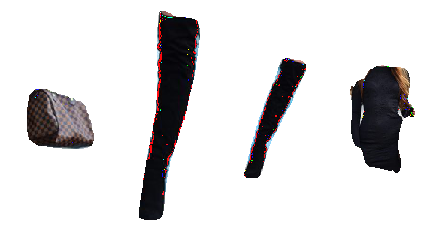

In [112]:
img_list = [
           'YDE-stuart-weitzman-style-suede-over-the-knee-boots-1024x682.jpg']
import matplotlib.image as mpimg
import cv2

import matplotlib.pyplot as plt
import numpy as np

def plot_figures(figures, nrows = 1, ncols=1):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows)
    for ind,title in zip(range(len(figures)), figures):
        axeslist.ravel()[ind].imshow(figures[title], cmap=plt.jet())
        #xeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional





def make_segmentation_mask(image, mask,rois):
        img = image.copy()
        img[:,:,0] *= mask
        img[:,:,1] *= mask
        img[:,:,2] *= mask
        #start y end y start x end x [429 501 642 566]
        img[img[:,:,:]== 0] = 255
        cropped = img[rois[0]:rois[2],rois[1]:rois[3]]
        #mat_plot_lib_figure
        #plt.imshow(cropped)
        #plt.show()
        return  cropped
        
        
for img in img_list:

    
    image = mpimg.imread('fashion/val/'+str(img))
    # Run object detection
    print(len([image]))
    results = model.detect([image], verbose=1)

    # Display results
    ax = get_ax(1)
    r = results[0]
    #image2 = image.copy()
    
    #print(image.shape,r['masks'].shape)
    #print(r['masks'].shape[-1])
    
    figures ={}
    for i in range(r['masks'].shape[-1]):
        #print(i)
        mask = r['masks'][:,:,i]
        croped_roi_image = make_segmentation_mask(image, mask,r['rois'][i])
        figures[i] = croped_roi_image
    
                

    # plot of the images in a figure, with 5 rows and 4 columns
    plot_figures(figures, 1,4)
    #plt.show()
    
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                                ['BG', 'top', 'boots', 'bag'], r['scores'], ax=ax,
                                title="")
  

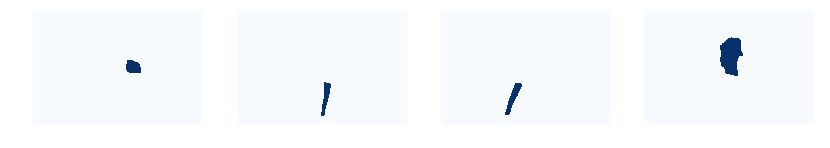

In [47]:
display_images(np.transpose(r['masks'], [2, 0, 1]), cmap="Blues")

1
Processing 1 images
image                    shape: (682, 1024, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[3 2 2 1]


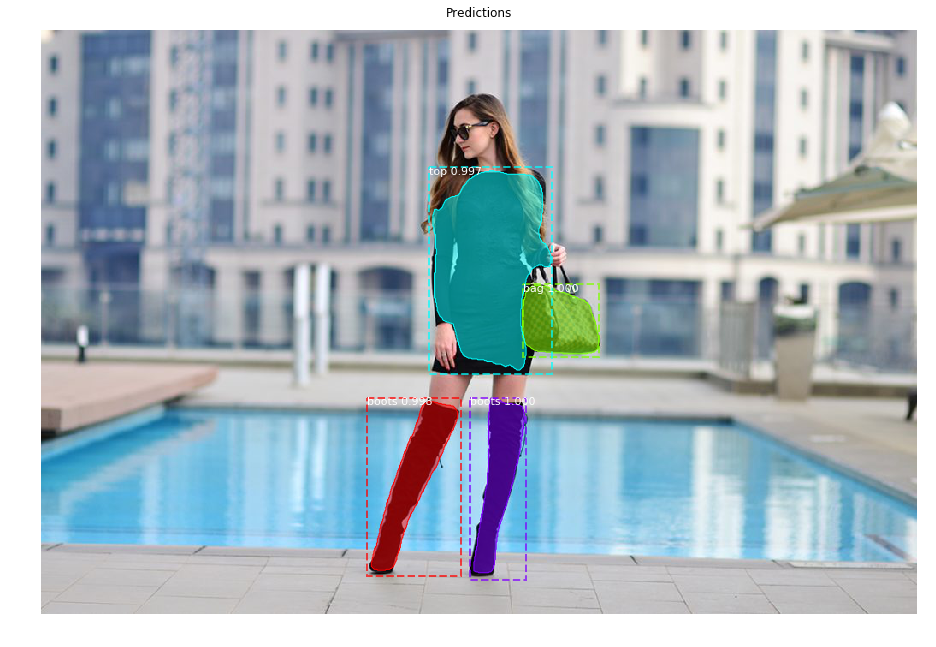